In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) # num_words: corpus에서 빈도순으로 높은 10000개만 사용하겠다

In [2]:
from tensorflow.keras.preprocessing import sequence
max_len = 200
x_train = sequence.pad_sequences(x_train, maxlen=max_len) #문서 최대 길이 200으로 조정
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [3]:
x_train.shape

(25000, 200)

In [4]:
y_test.shape

(25000,)

In [5]:
y_train.shape

(25000,)

In [6]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [8]:
y_test_one_hot.shape

(25000, 2)

In [9]:
y_test_one_hot[1]

array([0., 1.], dtype=float32)

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [14]:
model = models.Sequential()
# model.add(layers.Embedding(max_features, 64))
model.add(layers.Embedding(max_features, 64, input_length=max_len))
model.add(layers.SimpleRNN(32, activation='tanh', return_sequences=False))
# of parameters = 64*32+32*32+32 = 3104
model.add(layers.Dense(16, activation='tanh'))
# of parameters = (32+1)*16 = 528
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 64)           640000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 643,666
Trainable params: 643,666
Non-trainable params: 0
_________________________________________________________________


In [15]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history=model.fit(x_train, y_train_one_hot, epochs=10, 
                  batch_size=128, validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 16s 82ms/step - loss: 0.6006 - accuracy: 0.6771 - val_loss: 0.4436 - val_accuracy: 0.8136
Epoch 2/10
176/176 [==============================] - 19s 107ms/step - loss: 0.3662 - accuracy: 0.8500 - val_loss: 0.3538 - val_accuracy: 0.8528
Epoch 3/10
176/176 [==============================] - 14s 78ms/step - loss: 0.2656 - accuracy: 0.8957 - val_loss: 0.3338 - val_accuracy: 0.8640
Epoch 4/10
176/176 [==============================] - 14s 80ms/step - loss: 0.1978 - accuracy: 0.9259 - val_loss: 0.3268 - val_accuracy: 0.8696
Epoch 5/10
176/176 [==============================] - 14s 81ms/step - loss: 0.1364 - accuracy: 0.9524 - val_loss: 0.3802 - val_accuracy: 0.8512
Epoch 6/10
176/176 [==============================] - 14s 81ms/step - loss: 0.0769 - accuracy: 0.9748 - val_loss: 0.4811 - val_accuracy: 0.8184
Epoch 7/10
176/176 [==============================] - 15s 83ms/step - loss: 0.0399 - accuracy: 0.9886 - val_loss: 0.5716 - val_accuracy

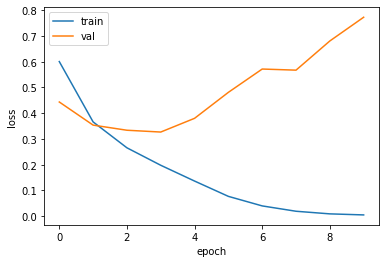

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [21]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 7s 9ms/step - loss: 0.6904 - accuracy: 0.8428


In [22]:
print('test_acc:', test_acc)

test_acc: 0.8428400158882141


In [12]:
preds = model.predict(x_test)

782/782 [==============================] - 7s 8ms/step


In [16]:
import numpy as np
labels=[0,1]
preds1 = [labels[np.argmax(probs)] for probs in preds]

In [17]:
preds1[0]

1

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds1)

array([[10540,  1960],
       [ 1969, 10531]], dtype=int64)

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test, preds1))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     12500
           1       0.84      0.84      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000

